<a href="https://colab.research.google.com/github/lilythomson13/API_lab/blob/main/Final_API_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:

import requests
import pandas as pd
import urllib.request
import json
import matplotlib.pyplot as plt

In [ ]:
#I followed along the rest of the lab accessing API's with Python, wrangling the data, and producing plots

In [40]:
#Question 5 for the lab
#Used documentation on the website

url= 'https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/'
api_key='?api_key=VfOma3AESXIgNbAEAW1ri9k6BbvrDn63UJ8th2oC'
query='&frequency=annual&data[0]=value&facets[stateId][]=MA&start=1970&end=2021&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000'

header={
    "frequency": "annual",
    "data": [
        "value"
    ],
    "facets": {
        "stateId": [
            "MA"
        ]
    },
    "start": "1970",
    "end": "2021",
    "sort": [
        {
            "column": "period",
            "direction": "asc"
        }
    ],
    "offset": 0,
    "length": 5000
}

response=urllib.request.urlopen(url+api_key+query)
response_bytes = response.read()
data=json.loads(response_bytes)
response.close()

In [41]:
df=pd.DataFrame.from_dict(data['response'])

df['data']


period=[]
sectorId=[]
sector_name=[]
fuelId=[]
fuel_name=[]
stateId=[]
state_name=[]
value=[]
value_units=[]

for entry in data['response']['data']:
  period.append(entry['period'])
  sectorId.append(entry['sectorId'])
  sector_name.append(entry['sector-name'])
  fuelId.append(entry['fuelId'])
  fuel_name.append(entry['fuel-name'])
  stateId.append(entry['stateId'])
  state_name.append(entry['state-name'])
  value.append(entry['value'])
  value_units.append(entry['value-units'])

#Used chat gpt to help put everything from the list into this dataframe
df2=pd.DataFrame({
    'Periods': period,
    'sectorId':sectorId,
    'sector-name': sector_name,
    'fuelId': fuelId,
    'fuel-name': fuel_name,
    'stateId': stateId,
    'state-name': state_name,
    'value': value,
    'value-units': value_units
})


print(df2)



     Periods sectorId                                      sector-name fuelId  \
0       1970       RC             Residential carbon dioxide emissions     CO   
1       1970       TT  Total carbon dioxide emissions from all sectors     NG   
2       1970       TT  Total carbon dioxide emissions from all sectors     PE   
3       1970       TT  Total carbon dioxide emissions from all sectors     CO   
4       1970       TT  Total carbon dioxide emissions from all sectors     TO   
...      ...      ...                                              ...    ...   
1243    2021       IC              Industrial carbon dioxide emissions     NG   
1244    2021       IC              Industrial carbon dioxide emissions     TO   
1245    2021       TT  Total carbon dioxide emissions from all sectors     TO   
1246    2021       TT  Total carbon dioxide emissions from all sectors     PE   
1247    2021       TT  Total carbon dioxide emissions from all sectors     NG   

        fuel-name stateId  

     Periods                                      sector-name fuelId  \
4       1970  Total carbon dioxide emissions from all sectors     TO   
28      1971  Total carbon dioxide emissions from all sectors     TO   
52      1972  Total carbon dioxide emissions from all sectors     TO   
76      1973  Total carbon dioxide emissions from all sectors     TO   
100     1974  Total carbon dioxide emissions from all sectors     TO   
139     1975  Total carbon dioxide emissions from all sectors     TO   
148     1976  Total carbon dioxide emissions from all sectors     TO   
172     1977  Total carbon dioxide emissions from all sectors     TO   
196     1978  Total carbon dioxide emissions from all sectors     TO   
220     1979  Total carbon dioxide emissions from all sectors     TO   
244     1980  Total carbon dioxide emissions from all sectors     TO   
268     1981  Total carbon dioxide emissions from all sectors     TO   
292     1982  Total carbon dioxide emissions from all sectors   

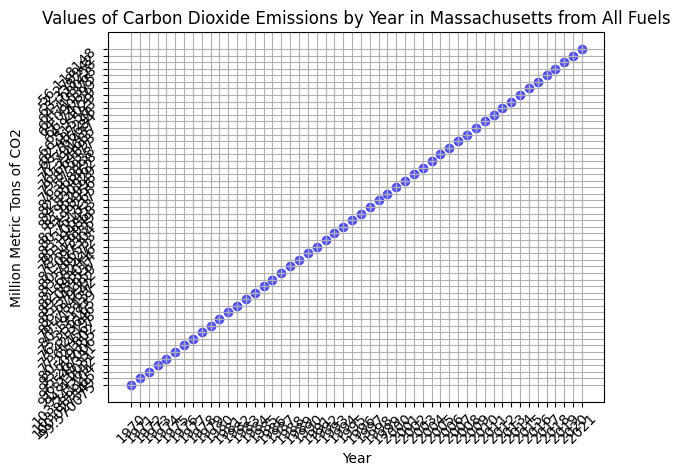

In [59]:

import numpy as np


df3=df2.drop("state-name", axis='columns')
df4=df3.drop('stateId', axis='columns')
df5=df4.drop('value-units', axis='columns')
df6=df5.drop('sectorId', axis='columns')



graph17=df6[df6['fuel-name'] == 'All Fuels']
#print(graph17)
graph18=graph17[graph17['sector-name'] == "Total carbon dioxide emissions from all sectors"]
print(graph18)


plt.scatter(graph18['Periods'], graph18['value'], color='blue', alpha=0.6)
plt.title('Values of Carbon Dioxide Emissions by Year in Massachusetts from All Fuels')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.ylabel('Million Metric Tons of CO2')
plt.yticks(rotation=45)
plt.grid()
plt.show()



     Periods                                      sector-name fuelId  \
2       1970  Total carbon dioxide emissions from all sectors     PE   
26      1971  Total carbon dioxide emissions from all sectors     PE   
50      1972  Total carbon dioxide emissions from all sectors     PE   
74      1973  Total carbon dioxide emissions from all sectors     PE   
98      1974  Total carbon dioxide emissions from all sectors     PE   
137     1975  Total carbon dioxide emissions from all sectors     PE   
146     1976  Total carbon dioxide emissions from all sectors     PE   
170     1977  Total carbon dioxide emissions from all sectors     PE   
194     1978  Total carbon dioxide emissions from all sectors     PE   
218     1979  Total carbon dioxide emissions from all sectors     PE   
242     1980  Total carbon dioxide emissions from all sectors     PE   
266     1981  Total carbon dioxide emissions from all sectors     PE   
290     1982  Total carbon dioxide emissions from all sectors   

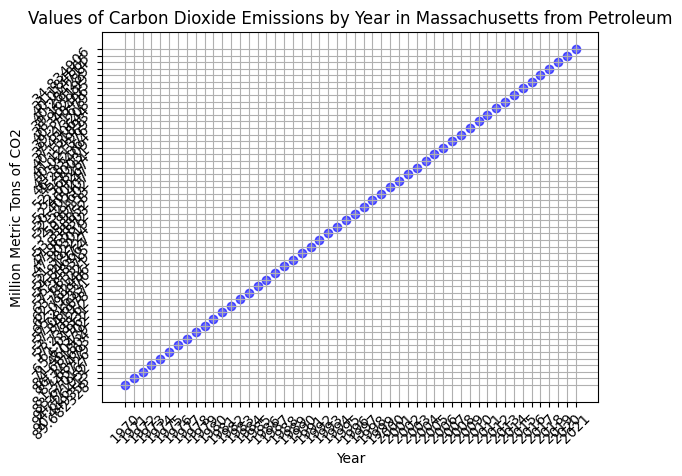

In [67]:


plot=df6[df6['fuel-name'] == 'Petroleum']

plot2=plot[graph17['sector-name'] == "Total carbon dioxide emissions from all sectors"]
print(plot2)

plt.scatter(plot2['Periods'], plot2['value'], color='blue', alpha=0.6)
plt.title('Values of Carbon Dioxide Emissions by Year in Massachusetts from Petroleum')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.ylabel('Million Metric Tons of CO2')
plt.yticks(rotation=45)
plt.grid()
plt.show()